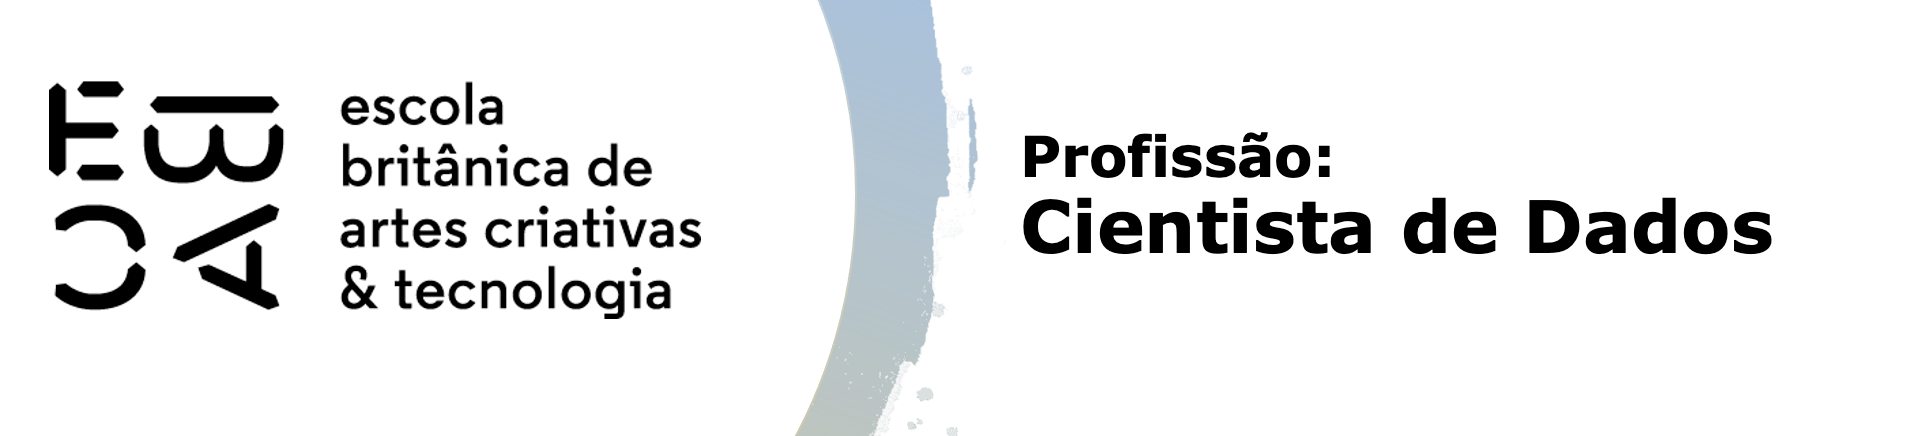

# Tarefa

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
pg = sns.load_dataset('penguins')

In [5]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

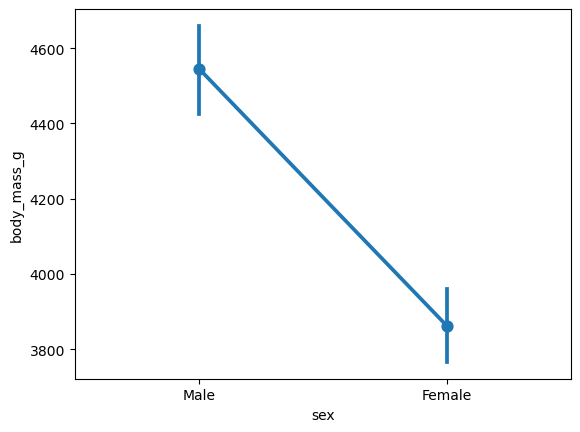

In [9]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [11]:
from scipy import stats

# Separando os grupos
male = pg.loc[pg['sex'] == 'Male', 'body_mass_g'].dropna()
female = pg.loc[pg['sex'] == 'Female', 'body_mass_g'].dropna()

In [13]:
t_stat, p_value = stats.ttest_ind(male, female, equal_var=False)

t_stat, p_value

(8.554537231165762, 4.793891255051457e-16)

Utilizando um teste t para duas amostras independentes, com nível de significância de 5%, rejeitamos a hipótese nula de igualdade entre os pesos médios de pinguins machos e fêmeas. O p-valor extremamente baixo (≈ 4.8×10⁻¹⁶) indica forte evidência estatística de que o peso médio dos machos é significativamente maior que o das fêmeas. Assim, assumindo que a amostra é aleatória e representativa, podemos extrapolar essa diferença para a população de pinguins.

----

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
# Dados
male = pg.loc[pg['sex'] == 'Male', 'body_mass_g'].dropna()
female = pg.loc[pg['sex'] == 'Female', 'body_mass_g'].dropna()

# Teste t de Welch
t_stat, p_value = stats.ttest_ind(male, female, equal_var=False)

# Graus de liberdade aproximados
n1, n2 = len(male), len(female)
s1, s2 = male.var(), female.var()

df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))
df

323.89588102864843

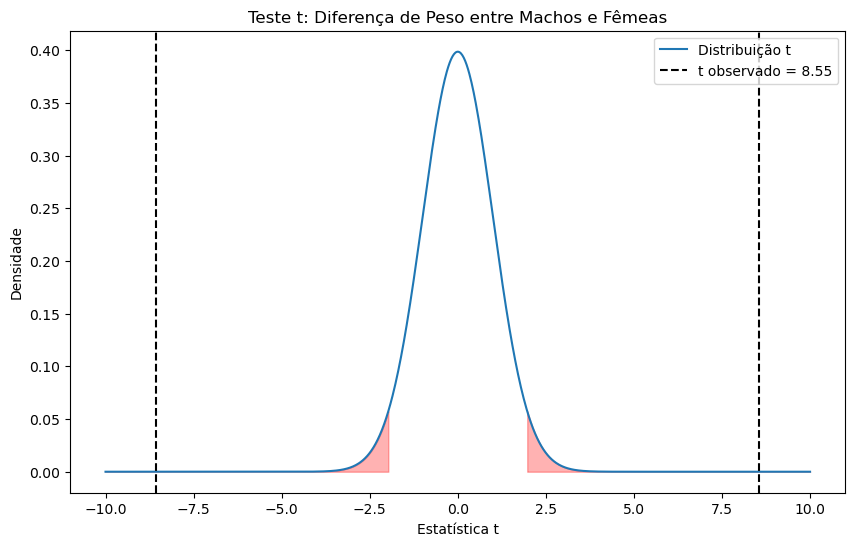

In [20]:
# Parâmetros
alpha = 0.05
x = np.linspace(-10, 10, 1000)

# Distribuição t
y = stats.t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Distribuição t')

# Região crítica
t_crit = stats.t.ppf(1 - alpha/2, df)

plt.fill_between(x, y, where=(x <= -t_crit), alpha=0.3, color='red')
plt.fill_between(x, y, where=(x >= t_crit), alpha=0.3, color='red')

# Estatística observada
plt.axvline(t_stat, color='black', linestyle='--', label=f't observado = {t_stat:.2f}')
plt.axvline(-t_stat, color='black', linestyle='--')

# Estética
plt.title('Teste t: Diferença de Peso entre Machos e Fêmeas')
plt.xlabel('Estatística t')
plt.ylabel('Densidade')
plt.legend()
plt.show()

O gráfico da distribuição t mostra claramente que a estatística observada do teste (t ≈ 8.55) encontra-se muito além da região crítica do teste bilateral com 5% de significância. Dessa forma, a visualização reforça a decisão estatística de rejeitar a hipótese nula, indicando que a diferença de peso entre pinguins machos e fêmeas é estatisticamente significativa.

----

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [23]:
from scipy import stats

resultados = {}

for especie in pg['species'].unique():
    dados_especie = pg[pg['species'] == especie]
    
    male = dados_especie.loc[dados_especie['sex'] == 'Male', 'body_mass_g'].dropna()
    female = dados_especie.loc[dados_especie['sex'] == 'Female', 'body_mass_g'].dropna()
    
    t_stat, p_value = stats.ttest_ind(male, female, equal_var=False)
    
    resultados[especie] = {
        't_stat': t_stat,
        'p_value': p_value,
        'n_male': len(male),
        'n_female': len(female)
    }

resultados

{'Adelie': {'t_stat': 13.126285923485874,
  'p_value': 6.402319748031793e-26,
  'n_male': 73,
  'n_female': 73},
 'Chinstrap': {'t_stat': 5.20773384899266,
  'p_value': 2.26443155146514e-06,
  'n_male': 34,
  'n_female': 34},
 'Gentoo': {'t_stat': 14.761368414543291,
  'p_value': 1.8677596749117468e-28,
  'n_male': 61,
  'n_female': 58}}

O teste t de Welch foi aplicado separadamente para cada espécie de pinguim com o objetivo de avaliar se a diferença de peso entre machos e fêmeas observada na amostra pode ser extrapolada para a população. Em todas as espécies (Adelie, Chinstrap e Gentoo), os p-values obtidos foram muito inferiores ao nível de significância de 5%, levando à rejeição da hipótese nula. Portanto, conclui-se que há evidência estatística robusta de dimorfismo sexual em termos de peso corporal em todas as espécies analisadas.

----